In [1]:
import pandas as pd
import numpy as np

In [2]:
# billgen = pd.read_csv('../capstone-data/ams_2020_billgen.csv')
# cargo = pd.read_csv('../capstone-data/ams_2020_cargodesc.csv')
# consignee = pd.read_csv('../capstone-data/ams_2020_consignee.csv')
# tariff = pd.read_csv('../capstone-data/ams_2020_tariff_2020.csv')
# container = pd.read_csv('../capstone-data/ams_2020_container.csv')
# notify = pd.read_csv('../capstone-data/ams_2020_notifyparty.csv')
# shipper = pd.read_csv('../capstone-data/ams_2020_shipper.csv')
# header = pd.read_csv('../capstone-data/ams_2020_header.csv')
# mark = pd.read_csv('../capstone-data/ams_2020_marksnumbers.csv')
# haz = pd.read_csv('../capstone-data/ams_2020_hazmat.csv')
# hazclass = pd.read_csv('../capstone-data/ams_2020_hazmatclass.csv')

In [2]:
pd.set_option('display.max_columns', 200)

In [18]:
header['estimated_arrival_date'].sort_values()

11159736    2017-02-02
12830009    2017-11-24
12635211    2018-01-04
1496658     2018-01-08
1496655     2018-01-08
               ...    
11718683    2020-12-08
70112       2020-12-29
927805      2020-12-29
1281341     2020-12-29
928370      2021-01-10
Name: estimated_arrival_date, Length: 14973956, dtype: object

In [12]:
header.columns

Index(['identifier', 'carrier_code', 'vessel_country_code', 'vessel_name',
       'port_of_unlading', 'estimated_arrival_date',
       'foreign_port_of_lading_qualifier', 'foreign_port_of_lading',
       'manifest_quantity', 'manifest_unit', 'weight', 'weight_unit',
       'measurement', 'measurement_unit', 'record_status_indicator',
       'place_of_receipt', 'port_of_destination',
       'foreign_port_of_destination_qualifier', 'foreign_port_of_destination',
       'conveyance_id_qualifier', 'conveyance_id', 'in_bond_entry_type',
       'mode_of_transportation', 'secondary_notify_party_1',
       'secondary_notify_party_2', 'secondary_notify_party_3',
       'secondary_notify_party_4', 'secondary_notify_party_5',
       'secondary_notify_party_6', 'secondary_notify_party_7',
       'secondary_notify_party_8', 'secondary_notify_party_9',
       'secondary_notify_party_10', 'actual_arrival_date'],
      dtype='object')

In [62]:
header['port_of_unlading'].value_counts(normalize=False).sort_values(ascending=False)[:5]

Los Angeles, California                     2857814
New York/Newark Area, Newark, New Jersey    2676744
Long Beach, California                      2410771
Savannah, Georgia                            969535
Oakland, California                          944246
Name: port_of_unlading, dtype: int64

In [32]:
header.head(3)

,identifier,carrier_code,vessel_country_code,vessel_name,port_of_unlading,estimated_arrival_date,foreign_port_of_lading_qualifier,foreign_port_of_lading,manifest_quantity,manifest_unit,weight,weight_unit,measurement,measurement_unit,record_status_indicator,place_of_receipt,port_of_destination,foreign_port_of_destination_qualifier,foreign_port_of_destination,conveyance_id_qualifier,conveyance_id,in_bond_entry_type,mode_of_transportation,secondary_notify_party_1,secondary_notify_party_2,secondary_notify_party_3,secondary_notify_party_4,secondary_notify_party_5,secondary_notify_party_6,secondary_notify_party_7,secondary_notify_party_8,secondary_notify_party_9,secondary_notify_party_10,actual_arrival_date
0,202001060,SWOE,US,PRESIDENT EISENHOWER,"Oakland, California",2019-08-09,Schedule K Foreign Port,"Shanghai ,China (Mainland)",18,PKG,5200,Kilograms,0,NaN,Amended,SHANGHAI CHINA,NaN,NaN,NaN,IMO Number/Lloyds Number,9295220,NaN,"Vessel, containerized",APLU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-09
1,202001061,SWOE,US,PRESIDENT EISENHOWER,"Oakland, California",2019-08-09,Schedule K Foreign Port,"Shanghai ,China (Mainland)",16,PKG,4375,Kilograms,0,NaN,Amended,SHANGHAI CHINA,NaN,NaN,NaN,IMO Number/Lloyds Number,9295220,NaN,"Vessel, containerized",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-09
2,202001062,OOLU,SG,THALASSA ELPIDA,"Savannah, Georgia",2019-08-27,Schedule K Foreign Port,"Kaohsiung,China (Taiwan)",568,CTN,1981,Kilograms,0,Cubic Meters,Amended,MANILA,NaN,NaN,NaN,IMO Number/Lloyds Number,9665621,NaN,"Vessel, containerized",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-27


In [24]:
billgen.head(3)

,identifier,master_bol_number,house_bol_number,sub_house_bol_number,voyage_number,bill_type_code,manifest_number,trade_update_date,run_date
0,202001060,APLUSHBW014713,SWOESH1S01451870,NaN,0DB4P,House Bill,1.0,2019-07-17,2020-01-06
1,202001061,APLUSHBW014714,SWOESH1S01451855,NaN,0DB4P,House Bill,1.0,2019-07-17,2020-01-06
2,202001062,OOLU2107899100,NaN,NaN,028E,Regular Bill,398798.0,2020-01-05,2020-01-06


In [5]:
cargo.head(1)

,identifier,container_number,description_sequence_number,piece_count,description_text
0,202001060,TEMU6512740,1,18.0,ANTENNA


In [6]:
consignee.head(1)

,identifier,consignee_name,consignee_address_1,consignee_address_2,consignee_address_3,consignee_address_4,city,state_province,zip_code,country_code,contact_name,comm_number_qualifier,comm_number
0,202001060,QUINTEL USA INC.,"33300 DOWE AVE. UNION CITY, CALIFOR","NIA, 94587, USA",NaN,NaN,OAKLAND,CA,94587,US,NaN,NaN,NaN


In [7]:
tariff.head(1)

,identifier,container_number,description_sequence_number,harmonized_number,harmonized_value,harmonized_weight,harmonized_weight_unit
0,2020010624,BMOU5228886,1,8451.0,0.0,6240,Kilograms


In [8]:
container.head(1)

,identifier,container_number,seal_number_1,seal_number_2,equipment_description_code,container_length,container_height,container_width,container_type,load_status,type_of_service
0,202001060,TEMU6512740,O1569143,NaN,Closed Container,0,0,0,NaN,Loaded,Pier to Pier


In [9]:
notify.head(1)

,identifier,notify_party_name,notify_party_address_1,notify_party_address_2,notify_party_address_3,notify_party_address_4,city,state_province,zip_code,country_code,contact_name,comm_number_qualifier,comm_number
0,202001062,DAMCO USA INC.,9300 ARROWPOINT BLVD.,CHARLOTTE NC,UNITED STATES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
shipper.head(1)

,identifier,shipper_party_name,shipper_party_address_1,shipper_party_address_2,shipper_party_address_3,shipper_party_address_4,city,state_province,zip_code,country_code,contact_name,comm_number_qualifier,comm_number
0,202001060,LEADTONE COMMUNICATION TECHNOLOIES,"NO.8 XINHUA ROAD XINWU ZONE WUXI,JI",ANGSU,214028 P.R.CHINA,NaN,JIANGSU,NaN,NaN,CN,NaN,NaN,NaN


In [13]:
mark.head(1)

,identifier,container_number,marks_and_numbers_1,marks_and_numbers_2,marks_and_numbers_3,marks_and_numbers_4,marks_and_numbers_5,marks_and_numbers_6,marks_and_numbers_7,marks_and_numbers_8
0,202001060,TEMU6512740,NO MARKS,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
haz.head(1)

,identifier,container_number,hazmat_sequence_number,hazmat_code,hazmat_class,hazmat_code_qualifier,hazmat_contact,hazmat_page_number,hazmat_flash_point_temperature,hazmat_flash_point_temperature_negative_ind,hazmat_flash_point_temperature_unit,hazmat_description
0,2020010618,CMAU4677843,1,3077,NaN,U,NaN,NaN,000,NaN,NaN,NaN


In [15]:
hazclass.head(1)

,identifier,container_number,hazmat_sequence_number,hazmat_classification
0,202001063287,TRHU3783906,1,3


In [5]:
mark.shape, haz.shape, hazclass.shape

((29516918, 10), (549674, 12), (15827, 4))

In [8]:
hazclass.head()

,identifier,container_number,hazmat_sequence_number,hazmat_classification
0,202001063287,TRHU3783906,1,3
1,2020010615887,HJMU4423831,1,6.1
2,2020010616465,TEMU8281785,1,3
3,2020010626242,TCKU2355870,1,6.1
4,2020010626248,TCKU2355870,1,6.1


In [7]:
header.columns

Index(['identifier', 'carrier_code', 'vessel_country_code', 'vessel_name',
       'port_of_unlading', 'estimated_arrival_date',
       'foreign_port_of_lading_qualifier', 'foreign_port_of_lading',
       'manifest_quantity', 'manifest_unit', 'weight', 'weight_unit',
       'measurement', 'measurement_unit', 'record_status_indicator',
       'place_of_receipt', 'port_of_destination',
       'foreign_port_of_destination_qualifier', 'foreign_port_of_destination',
       'conveyance_id_qualifier', 'conveyance_id', 'in_bond_entry_type',
       'mode_of_transportation', 'secondary_notify_party_1',
       'secondary_notify_party_2', 'secondary_notify_party_3',
       'secondary_notify_party_4', 'secondary_notify_party_5',
       'secondary_notify_party_6', 'secondary_notify_party_7',
       'secondary_notify_party_8', 'secondary_notify_party_9',
       'secondary_notify_party_10', 'actual_arrival_date'],
      dtype='object')

In [11]:
hazclass.isna().sum()

identifier                0
container_number          0
hazmat_sequence_number    0
hazmat_classification     0
dtype: int64

In [13]:
hazclass['hazmat_classification'].value_counts(normalize=True)

3                                                  0.130410
8                                                  0.081759
6.1                                                0.066469
2                                                  0.065521
CHEMTREC 1 703 527 3887                            0.063941
                                                     ...   
1 703 527 3887 D LINEAR ALKYL                      0.000063
CHEMTREC 1 703 527 3887 NAPHTHALENE                0.000063
ALCOHOLS; C-16-18 AND C18 UNSA TD:; ETHOXYLATES    0.000063
CHEMTREC 1 703 527 3887 OLECALCIFEROL              0.000063
(METHYL THIOBUTYRATE)                              0.000063
Name: hazmat_classification, Length: 983, dtype: float64

In [48]:
import requests

In [52]:
import geojson as gj
import json

In [53]:
!pip install shapely

     |████████████████████████████████| 1.2 MB 4.4 MB/s eta 0:00:01


In [54]:
!pip install fiona

     |████████████████████████████████| 19.3 MB 13.8 MB/s eta 0:00:01


In [55]:
!pip install pyproj

     |████████████████████████████████| 7.7 MB 4.6 MB/s eta 0:00:01


In [56]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 4.6 MB/s eta 0:00:01


In [57]:
import geopandas as gdp

In [58]:
# snow = pd.read_csv('../capstone-data/snow/ground_measures_train_features.csv',index_col='Unnamed: 0')
# snow_targ = pd.read_csv('../capstone-data/snow/ground_measures_metadata.csv')
# sample = pd.read_csv('../capstone-data/snow/submission_format.csv')
data = gdp.read_file('../capstone-data/snow/grid_cells.geojson')

In [61]:
data

,cell_id,region,geometry
0,0003f387-71c4-48f6-b2b0-d853bd4f0aba,sierras,"POLYGON ((-118.71895 37.07419, -118.71895 37.0..."
1,000617d8-8c14-43e2-b708-7e3a69fe3cc3,central rockies,"POLYGON ((-107.07679 37.78042, -107.07679 37.7..."
2,000863e7-21e6-477d-b799-f5675c348627,other,"POLYGON ((-119.40167 37.02400, -119.40167 37.0..."
3,000ba8d9-d6d5-48da-84a2-1fa54951fae1,sierras,"POLYGON ((-119.32082 37.43171, -119.32082 37.4..."
4,00146204-d4e9-4cd8-8f86-d1ef133c5b6d,sierras,"POLYGON ((-118.52132 36.65735, -118.52132 36.6..."
...,...,...,...
18125,ffdfb5a4-91a0-41a9-a4d5-501b04ef6326,sierras,"POLYGON ((-118.62014 37.11718, -118.62014 37.1..."
18126,ffe43514-2c92-43b6-bd84-d183806aca65,other,"POLYGON ((-123.49799 47.90132, -123.49799 47.9..."
18127,ffeabc13-7c6f-4b63-b043-19c8f15e0345,sierras,"POLYGON ((-119.64422 37.87976, -119.64422 37.8..."
18128,fff95195-ccc9-40b7-b302-a0d8570c86bc,other,"POLYGON ((-123.37223 47.73242, -123.37223 47.7..."


In [37]:
snow_targ

,station_id,name,elevation_m,latitude,longitude,state
0,CDEC:ADM,Adin Mountain,1889.760000,41.237000,-120.792000,California
1,CDEC:AGP,Agnew Pass,2880.360000,37.726631,-119.141731,California
2,CDEC:ALP,Alpha (Smud),2316.480000,38.804192,-120.215652,California
3,CDEC:BCB,Blackcap Basin,3139.440000,37.066685,-118.773010,California
4,CDEC:BCH,Beach Meadows,2331.720000,36.126095,-118.293457,California
...,...,...,...,...,...,...
695,SNOTEL:989_ID_SNTL,Moscow Mountain,1432.560059,46.805000,-116.853500,Idaho
696,SNOTEL:990_WA_SNTL,Beaver Pass,1106.423950,48.879299,-121.255501,Washington
697,SNOTEL:992_UT_SNTL,Bear River RS,2675.229492,40.885201,-110.827698,Utah
698,SNOTEL:998_WA_SNTL,Easy Pass,1606.296021,48.859329,-121.438950,Washington


In [17]:
snow.head()

,2013-01-01,2013-01-08,2013-01-15,2013-01-22,2013-01-29,2013-02-05,2013-02-12,2013-02-19,2013-02-26,2013-03-05,2013-03-12,2013-03-19,2013-03-26,2013-04-02,2013-04-09,2013-04-16,2013-04-23,2013-04-30,2013-05-07,2013-05-14,2013-05-21,2013-05-28,2013-06-04,2013-06-11,2013-06-18,2013-06-25,2013-12-03,2013-12-10,2013-12-17,2013-12-24,2013-12-31,2014-01-07,2014-01-14,2014-01-21,2014-01-28,2014-02-04,2014-02-11,2014-02-18,2014-02-25,2014-03-04,2014-03-11,2014-03-18,2014-03-25,2014-04-01,2014-04-08,2014-04-15,2014-04-22,2014-04-29,2014-05-06,2014-05-13,2014-05-20,2014-05-27,2014-06-03,2014-06-10,2014-06-17,2014-06-24,2014-12-02,2014-12-09,2014-12-16,2014-12-23,2014-12-30,2015-01-06,2015-01-13,2015-01-20,2015-01-27,2015-02-03,2015-02-10,2015-02-17,2015-02-24,2015-03-03,2015-03-10,2015-03-17,2015-03-24,2015-03-31,2015-04-07,2015-04-14,2015-04-21,2015-04-28,2015-05-05,2015-05-12,2015-05-19,2015-05-26,2015-06-02,2015-06-09,2015-06-16,2015-06-23,2015-06-30,2015-12-01,2015-12-08,2015-12-15,2015-12-22,2015-12-29,2016-01-05,2016-01-12,2016-01-19,2016-01-26,2016-02-02,2016-02-09,2016-02-16,2016-02-23,...,2016-05-31,2016-06-07,2016-06-14,2016-06-21,2016-06-28,2016-12-06,2016-12-13,2016-12-20,2016-12-27,2017-01-03,2017-01-10,2017-01-17,2017-01-24,2017-01-31,2017-02-07,2017-02-14,2017-02-21,2017-02-28,2017-03-07,2017-03-14,2017-03-21,2017-03-28,2017-04-04,2017-04-11,2017-04-18,2017-04-25,2017-05-02,2017-05-09,2017-05-16,2017-05-23,2017-05-30,2017-06-06,2017-06-13,2017-06-20,2017-06-27,2017-12-05,2017-12-12,2017-12-19,2017-12-26,2018-01-02,2018-01-09,2018-01-16,2018-01-23,2018-01-30,2018-02-06,2018-02-13,2018-02-20,2018-02-27,2018-03-06,2018-03-13,2018-03-20,2018-03-27,2018-04-03,2018-04-10,2018-04-17,2018-04-24,2018-05-01,2018-05-08,2018-05-15,2018-05-22,2018-05-29,2018-06-05,2018-06-12,2018-06-19,2018-06-26,2018-12-04,2018-12-11,2018-12-18,2018-12-25,2019-01-01,2019-01-08,2019-01-15,2019-01-22,2019-01-29,2019-02-05,2019-02-12,2019-02-19,2019-02-26,2019-03-05,2019-03-12,2019-03-19,2019-03-26,2019-04-02,2019-04-09,2019-04-16,2019-04-23,2019-04-30,2019-05-07,2019-05-14,2019-05-21,2019-05-28,2019-06-04,2019-06-11,2019-06-18,2019-06-25,2019-12-03,2019-12-10,2019-12-17,2019-12-24,2019-12-31
CDEC:ADM,5.90,5.90,6.50,6.50,7.40,7.60,7.40,8.00,8.00,8.00,8.50,6.20,4.10,1.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.20,0.40,0.50,0.50,0.50,0.80,0.70,0.20,0.10,1.60,1.00,1.50,0.70,0.60,0.00,0.00,3.60,2.90,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.60,0.00,0.90,1.40,1.80,2.30,2.30,1.60,1.40,0.80,0.60,0.20,0.10,0.20,0.00,0.00,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.10,0.0,0.0,2.70,NaN,5.60,9.30,11.20,11.30,11.90,13.80,15.50,17.20,17.60,17.60,19.00,...,0.00,0.00,0.00,0.0,0.0,2.20,2.70,3.40,3.70,5.50,8.10,11.20,12.60,13.30,15.40,15.60,17.80,NaN,22.40,21.50,18.20,19.20,17.60,16.70,16.30,13.00,7.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.20,0.40,0.80,1.20,1.30,0.60,0.60,1.70,2.90,2.80,1.70,1.60,3.30,4.50,4.90,6.20,7.30,4.80,0.90,0.80,0.00,0.70,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.20,2.50,3.10,4.90,4.60,6.30,6.50,10.20,10.90,12.00,14.50,17.00,18.60,20.50,22.60,22.1,21.70,21.30,18.20,15.80,9.80,0.40,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0.70,1.20,3.40,3.70,3.40
CDEC:AGP,17.52,17.54,17.85,17.39,18.03,17.70,17.65,16.66,17.21,16.26,18.00,18.11,17.96,17.94,11.41,5.39,3.82,3.60,1.06,0.74,0.74,0.67,0.35,0.42,0.13,0.01,1.72,4.16,3.99,3.88,5.70,6.44,7.36,7.24,7.72,8.24,9.49,9.29,8.75,13.31,13.24,12.24,11.33,13.21,13.11,10.62,5.83,5.20,0.84,0.51,0.11,0.00,0.0,0.00,0.0,0.00,0.77,3.67,5.31,5.51,5.67,6.02,5.57,5.69,5.79,6.54,9.01,8.71,6.86,7.83,6.99,4.93,3.29,1.58,1.95,1.07,0.34,0.52,0.42,0.52,0.08,0.20,0.1,0.0,0.01,0.0,0.0,2.96,2.79,4.77,5.00,6.80,7.02,8.99,9.89,12.32,15.35,15.25,14.53,16.03,...,0.00,0.00,0.05,0.0,0.0,3.99,4.97,8.68,9.03,8.29,23.89,30.52,41.60,41.93,45.04,50.78,55.45,55.73,54.40,53.68,52.78,55.60,56.87,60.95,61.04,41.44,1.40,1.86,0.72,0.63,0.66,0.89,0.88,1.56,1.00,7.41,8.45,8.16,8.69,8.38,10.79,9.50,10.30,

In [27]:
snow=snow.fillna(0)

In [28]:
snow.isna().sum()[:20]

2013-01-01    0
2013-01-08    0
2013-01-15    0
2013-01-22    0
2013-01-29    0
2013-02-05    0
2013-02-12    0
2013-02-19    0
2013-02-26    0
2013-03-05    0
2013-03-12    0
2013-03-19    0
2013-03-26    0
2013-04-02    0
2013-04-09    0
2013-04-16    0
2013-04-23    0
2013-04-30    0
2013-05-07    0
2013-05-14    0
dtype: int64

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [25]:
lr = LinearRegression()

In [ ]:


X_train,X_test,y_train,y_test = train_test_split()

In [62]:
df=pd.read_csv('../capstone-data/globalOil_Aug2020SampleDetailed.csv')

In [65]:
df.head()

,timeStampDate,timeStampTime,locationCode,terminalName,locationName,territoryName,countryName,regionName,companyName,tankName,tankFill,percentFill,capacity,crude,storageType,reportDate,reportDateTime,carryForward,publishDate,firstReportDate
0,2020-07-30,12:24:46,CUH,"Plains All American Pipeline, LP (Cushing)",Cushing,PADD 2,United States,Americas,Plains All American Pipeline LP,CUH001,161771,59.65%,271216,Yes,Non-Refinery,2020-08-06,14:00:00,False,2020-08-03 13:45:02,2017-04-26 14:00:00
1,2020-08-06,00:26:12,CUH,"Plains All American Pipeline, LP (Cushing)",Cushing,PADD 2,United States,Americas,Plains All American Pipeline LP,CUH001,216838,79.95%,271216,Yes,Non-Refinery,2020-08-13,14:00:00,False,2020-08-10 13:45:01,2017-04-26 14:00:00
2,2020-08-13,00:16:07,CUH,"Plains All American Pipeline, LP (Cushing)",Cushing,PADD 2,United States,Americas,Plains All American Pipeline LP,CUH001,76275,28.12%,271216,Yes,Non-Refinery,2020-08-20,14:00:00,False,2020-08-17 13:45:02,2017-04-26 14:00:00
3,2020-08-20,00:16:04,CUH,"Plains All American Pipeline, LP (Cushing)",Cushing,PADD 2,United States,Americas,Plains All American Pipeline LP,CUH001,251981,92.91%,271216,Yes,Non-Refinery,2020-08-27,14:00:00,False,2020-08-24 13:45:01,2017-04-26 14:00:00
4,2020-07-30,12:24:46,CUH,"Plains All American Pipeline, LP (Cushing)",Cushing,PADD 2,United States,Americas,Plains All American Pipeline LP,CUH002,241281,93.01%,259423,Yes,Non-Refinery,2020-08-06,14:00:00,False,2020-08-03 13:45:02,2017-04-26 14:00:00


In [67]:
df['timeStampDate'] = pd.to_datetime(df['timeStampDate'])

In [69]:
df.set_index('timeStampDate',inplace=True)

In [70]:
df.head()

,timeStampTime,locationCode,terminalName,locationName,territoryName,countryName,regionName,companyName,tankName,tankFill,percentFill,capacity,crude,storageType,reportDate,reportDateTime,carryForward,publishDate,firstReportDate
timeStampDate,,,,,,,,,,,,,,,,,,,
2020-07-30,12:24:46,CUH,"Plains All American Pipeline, LP (Cushing)",Cushing,PADD 2,United States,Americas,Plains All American Pipeline LP,CUH001,161771,59.65%,271216,Yes,Non-Refinery,2020-08-06,14:00:00,False,2020-08-03 13:45:02,2017-04-26 14:00:00
2020-08-06,00:26:12,CUH,"Plains All American Pipeline, LP (Cushing)",Cushing,PADD 2,United States,Americas,Plains All American Pipeline LP,CUH001,216838,79.95%,271216,Yes,Non-Refinery,2020-08-13,14:00:00,False,2020-08-10 13:45:01,2017-04-26 14:00:00
2020-08-13,00:16:07,CUH,"Plains All American Pipeline, LP (Cushing)",Cushing,PADD 2,United States,Americas,Plains All American Pipeline LP,CUH001,76275,28.12%,271216,Yes,Non-Refinery,2020-08-20,14:00:00,False,2020-08-17 13:45:02,2017-04-26 14:00:00
2020-08-20,00:16:04,CUH,"Plains All American Pipeline, LP (Cushing)",Cushing,PADD 2,United States,Americas,Plains All American Pipeline LP,CUH001,251981,92.91%,271216,Yes,Non-Refinery,2020-08-27,14:00:00,False,2020-08-24 13:45:01,2017-04-26 14:00:00
2020-07-30,12:24:46,CUH,"Plains All American Pipeline, LP (Cushing)",Cushing,PADD 2,United States,Americas,Plains All American Pipeline LP,CUH002,241281,93.01%,259423,Yes,Non-Refinery,2020-08-06,14:00:00,False,2020-08-03 13:45:02,2017-04-26 14:00:00


In [76]:
df['percentFill']= df['percentFill'].str.replace('%', '')

In [80]:
df['percentFill']=df['percentFill'].astype(float)/100

<AxesSubplot:xlabel='timeStampDate'>

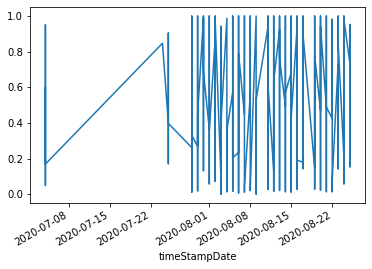

In [81]:
df['percentFill'].plot()

In [63]:
df1 = pd.read_csv('../capstone-data/hawaii.csv')#,sep=None,engine='python')
df2 = pd.read_csv('../capstone-data/hawaii2.csv')#,sep=None,engine='python')

In [64]:
df= pd.concat([df1,df2])
df.shape

(1048899, 3)

In [65]:
df.head()

,timestamp,value,quality_flag
0,20200101T11:59:00+0000,-1.66921,18
1,20200101T12:00:00+0000,-1.59776,18
2,20200101T12:01:00+0000,-1.76662,18
3,20200101T12:02:00+0000,-2.13683,18
4,20200101T12:03:00+0000,-2.33817,18


In [68]:
df.fillna(0,inplace=True)

In [69]:
df['timestamp']= pd.to_datetime(df['timestamp'],format="%Y/%m/%d")

In [70]:
 df['timestamp'] = df['timestamp'].dt.date

In [71]:
df.head()

,timestamp,value,quality_flag
0,2020-01-01,-1.66921,18
1,2020-01-01,-1.59776,18
2,2020-01-01,-1.76662,18
3,2020-01-01,-2.13683,18
4,2020-01-01,-2.33817,18


In [72]:
df.set_index('timestamp',inplace=True)

In [73]:
df.head()

,value,quality_flag
timestamp,,
2020-01-01,-1.66921,18
2020-01-01,-1.59776,18
2020-01-01,-1.76662,18
2020-01-01,-2.13683,18
2020-01-01,-2.33817,18


In [78]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

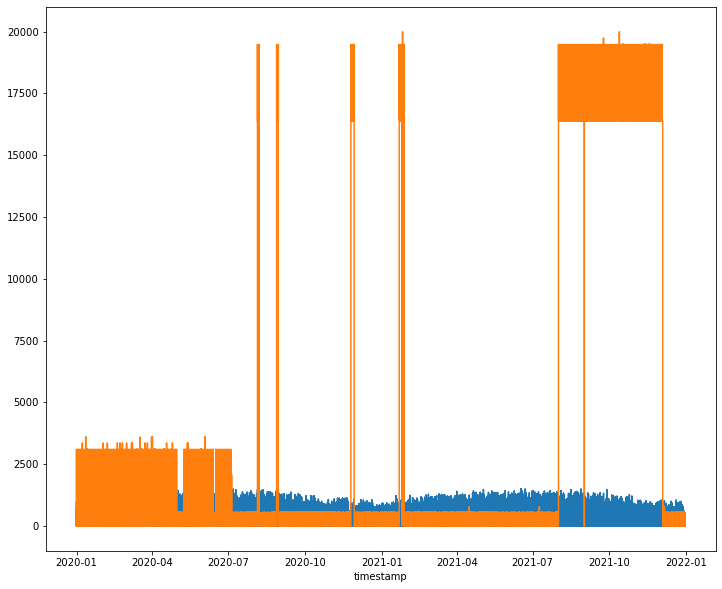

In [77]:
plt.figure(figsize=(12,10))
df['value'].plot()
df['quality_flag'].plot();

In [83]:
X=df.drop(columns='quality_flag')
y=df['quality_flag']

lr=LinearRegression()
lr.fit(X,y)


LinearRegression()

In [84]:
lr.score(X,y)

0.00018260266515202073

In [3]:
df = pd.read_csv('../capstone-data/us_government_spending_202008031705_us_government_spending__contracts_2020__202008031705.csv')

/opt/anaconda3/envs/dsi/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (5,20,39,41,47,51,53,54,61,66,67,68,69,70,71,85,86,93,94,95,96,113,114,142,143,148,153,154,157,158) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df.shape

(3722494, 275)

In [5]:
df.head()

,contract_transaction_unique_key,contract_award_unique_key,award_id_piid,modification_number,transaction_number,parent_award_agency_id,parent_award_agency_name,parent_award_id_piid,parent_award_modification_number,federal_action_obligation,total_dollars_obligated,base_and_exercised_options_value,current_total_value_of_award,base_and_all_options_value,potential_total_value_of_award,action_date,action_date_fiscal_year,period_of_performance_start_date,period_of_performance_current_end_date,period_of_performance_potential_end_date,ordering_period_end_date,solicitation_date,awarding_agency_code,awarding_agency_name,awarding_sub_agency_code,awarding_sub_agency_name,awarding_office_code,awarding_office_name,funding_agency_code,funding_agency_name,funding_sub_agency_code,funding_sub_agency_name,funding_office_code,funding_office_name,treasury_accounts_funding_this_award,federal_accounts_funding_this_award,foreign_funding,foreign_funding_description,sam_exception,sam_exception_description,recipient_name,recipient_doing_business_as_name,cage_code,recipient_parent_name,recipient_country_code,recipient_country_name,recipient_address_line_1,recipient_address_line_2,recipient_city_name,recipient_state_code,recipient_state_name,recipient_zip_4_code,recipient_congressional_district,recipient_phone_number,recipient_fax_number,primary_place_of_performance_country_code,primary_place_of_performance_country_name,primary_place_of_performance_city_name,primary_place_of_performance_county_name,primary_place_of_performance_state_code,primary_place_of_performance_state_name,primary_place_of_performance_zip_4,primary_place_of_performance_congressional_district,award_or_idv_flag,award_type_code,award_type,idv_type_code,idv_type,multiple_or_single_award_idv_code,multiple_or_single_award_idv,type_of_idc_code,type_of_idc,type_of_contract_pricing_code,type_of_contract_pricing,award_description,action_type_code,action_type,solicitation_identifier,number_of_actions,inherently_governmental_functions,inherently_governmental_functions_description,product_or_service_code,product_or_service_code_description,contract_bundling_code,contract_bundling,dod_claimant_program_code,dod_claimant_program_description,naics_code,naics_description,recovered_materials_sustainability_code,recovered_materials_sustainability,domestic_or_foreign_entity_code,domestic_or_foreign_entity,dod_acquisition_program_code,dod_acquisition_program_description,information_technology_commercial_item_category_code,information_technology_commercial_item_category,epa_designated_product_code,epa_designated_product,country_of_product_or_service_origin_code,...,indian_tribe_federally_recognized,native_hawaiian_organization_owned_firm,tribally_owned_firm,veteran_owned_business,service_disabled_veteran_owned_business,woman_owned_business,women_owned_small_business,economically_disadvantaged_women_owned_small_business,joint_venture_women_owned_small_business,joint_venture_economic_disadvantaged_women_owned_small_bus,minority_owned_business,subcontinent_asian_asian_indian_american_owned_business,asian_pacific_american_owned_business,black_american_owned_business,hispanic_american_owned_business,native_american_owned_business,other_minority_owned_business,contracting_officers_determination_of_business_size,contracting_officers_determination_of_business_size_code,emerging_small_business,community_developed_corporation_owned_firm,labor_surplus_area_firm,us_federal_government,federally_funded_research_and_development_corp,federal_agency,us_state_government,us_local_government,city_local_government,county_local_government,inter_municipal_local_government,local_government_owned,municipality_local_government,school_district_local_government,township_local_government,us_tribal_government,foreign_government,organizational_type,corporate_entity_not_tax_exempt,corporate_entity_tax_exempt,partnership_or_limited_liability_partnership,sole_proprietorship,small_agricultural_cooperative,international_organization,us_govern

In [12]:
df.isna().sum().sort_values(ascending=False)[200:275]

school_of_forestry                         0
private_university_or_college              0
the_ability_one_program                    0
other_not_for_profit_organization          0
nonprofit_organization                     0
                                          ..
woman_owned_business                       0
service_disabled_veteran_owned_business    0
veteran_owned_business                     0
tribally_owned_firm                        0
year                                       0
Length: 75, dtype: int64

In [9]:
df['woman_owned_business'].value_counts(normalize=True)

f    0.885424
t    0.114576
Name: woman_owned_business, dtype: float64

In [13]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose

In [14]:
def plot_series(df,cols=None,title= 'Title', xlab=None,ylab=None):

    # Set figure size to be (18, 9).
    plt.figure(figsize=(18,9))
    
    # Iterate through each column name.
    for col in cols:
        
        # Generate a line plot of the column name.
        # You only have to specify Y, since our
        # index will be a datetime index.
         plt.plot(df[col])
        
    # Generate title and labels.
    plt.title(title,fontsize=26)
    plt.xlabel(xlab,fontsize=20)
    plt.ylabel(ylab,fontsize=20)
    # Enlarge tick marks.
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)

In [15]:
df = pd.read_csv('../capstone-data/hawaii.csv')

In [16]:
df

,timestamp,value,quality_flag
0,20200101T11:59:00+0000,-1.66921,18
1,20200101T12:00:00+0000,-1.59776,18
2,20200101T12:01:00+0000,-1.76662,18
3,20200101T12:02:00+0000,-2.13683,18
4,20200101T12:03:00+0000,-2.33817,18
...,...,...,...
524977,20201231T09:55:00+0000,-2.73375,18
524978,20201231T09:56:00+0000,-2.74025,18
524979,20201231T09:57:00+0000,-2.72726,18
524980,20201231T09:58:00+0000,-2.72726,18
